<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Oversample" data-toc-modified-id="Oversample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Oversample</a></span></li><li><span><a href="#Classfication-model" data-toc-modified-id="Classfication-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classfication model</a></span></li><li><span><a href="#More-complex-case" data-toc-modified-id="More-complex-case-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>More complex case</a></span></li><li><span><a href="#Really-complex-case-(test)" data-toc-modified-id="Really-complex-case-(test)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Really complex case (test)</a></span></li></ul></div>

In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
from collections import Counter

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [5]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

In [6]:
counter=Counter(y)

In [7]:
counter

Counter({0: 987, 1: 13})

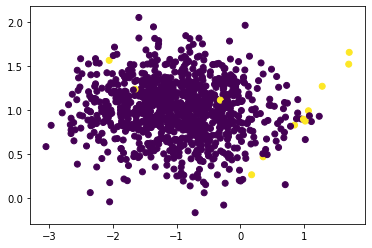

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, label=str(y))
plt.show()

# Oversample

In [10]:
over=SMOTE()
X,y=over.fit_resample(X,y)

Counter({0: 987, 1: 987})


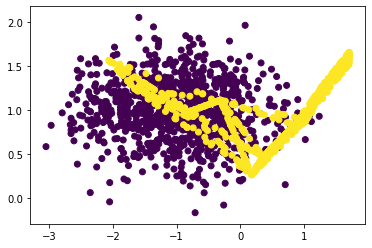

In [12]:
counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y, label=str(y))
plt.show()

Counter({0: 987, 1: 98})


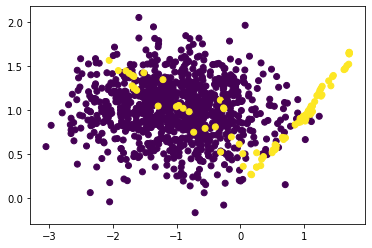

In [14]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

over=SMOTE(sampling_strategy=0.1)
X,y=over.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y, label=str(y))
plt.show()

Counter({0: 394, 1: 197})


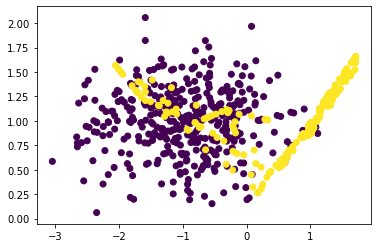

In [18]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

over=SMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X,y=pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y, label=str(y))
plt.show()

In [19]:
from imblearn.over_sampling import BorderlineSMOTE

Counter({0: 394, 1: 197})


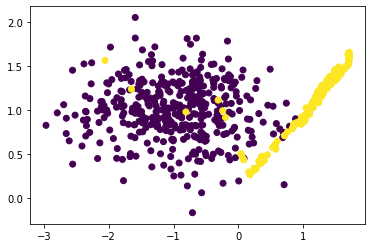

In [24]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under)]
pipe=Pipeline(steps=steps)

X,y=pipe.fit_resample(X,y)

counter=Counter(y)
print(counter)

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Classfication model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold

Build a baseline model that I will use as a benchmark to see the increase or decreasein perforance after using over- and undersampling techniques

In [28]:
model=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [29]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)



scores=cross_val_score(model, X,y, scoring='recall', cv=cv, n_jobs=-1)

In [31]:
print('Mean recall is',np.mean(scores))

Mean recall is 0.38333333333333336


Building model #1

In [32]:
over=SMOTE()
steps=[('o',over),('model',model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall is',np.mean(scores))

Mean recall is 0.6666666666666666


Model #2

In [33]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.5)

steps=[('o',over), ('u',under),('model',model)]
pipe=Pipeline(steps=steps)

scores=cross_val_score(pipe, X,y, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall is',np.mean(scores))

Mean recall is 0.6166666666666667


I need to validate my model. In order to do so, we need to split our dataset into train/test before we built our model.

In [34]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0,\
                          n_clusters_per_class=1, weights=[0.99],\
                          random_state=11)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=11)

In [39]:
over=BorderlineSMOTE(sampling_strategy=0.1)
under=RandomUnderSampler(sampling_strategy=0.5)
model=DecisionTreeClassifier()

steps=[('o',over),('u',under),('model',model)]
pipe=Pipeline(steps=steps)
cv=RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=1)

scores=cross_val_score(pipe, X_train, y_train, scoring='recall', cv=cv, n_jobs=-1)
print('Mean recall is',np.mean(scores))

Mean recall is 0.5


In [47]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('o', BorderlineSMOTE(sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('model', DecisionTreeClassifier())])

In [48]:
pipe.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0])

In [49]:
from sklearn.metrics import recall_score, confusion_matrix

In [50]:
recall_score(y_test, pipe.predict(X_test))

0.6666666666666666

In [51]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[235,  12],
       [  1,   2]], dtype=int64)

# More complex case

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [72]:
X,y = make_classification(n_classes=2, n_informative=4, n_redundant=2, n_features=10, n_clusters_per_class=1,\
                          n_samples=1000, weights=[0.95,0.05], random_state=11)

In [73]:
counter=Counter(y)
counter

Counter({0: 944, 1: 56})

In [83]:
pca=PCA(0.85)
over=BorderlineSMOTE(sampling_strategy=0.2)
under=RandomUnderSampler(sampling_strategy=0.4)
model=KNeighborsClassifier()

pipe=Pipeline([('o',over),('u',under), ('pca',pca),('model',model)])

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=11)

Build a baseline model

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
baseline=KNeighborsClassifier()

baseline.fit(X_train, y_train)

recall_score(y_test,baseline.predict(X_test))

0.8571428571428571

In [85]:
confusion_matrix(y_test,baseline.predict(X_test))

array([[236,   0],
       [  2,  12]], dtype=int64)

Testing our pipe

In [86]:
pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

In [87]:
recall_score(y_test,pipe.predict(X_test))

0.8571428571428571

In [88]:
confusion_matrix(y_test,pipe.predict(X_test))

array([[236,   0],
       [  2,  12]], dtype=int64)

# Really complex case (test)

In [89]:
Counter(y)

Counter({0: 944, 1: 56})

In [90]:
X.shape

(1000, 10)

In [109]:
model=KNeighborsClassifier(n_jobs=-1)
over=BorderlineSMOTE(sampling_strategy=0.1, k_neighbors=6)
under=RandomUnderSampler(sampling_strategy=0.5)
pca=PCA(0.85)

In [110]:
params={'n_neighbors':range(3,10,2),
    'weights':['uniform','distance'],
    'leaf_size':[30,45],
    'p':[1,2,3]}

In [111]:
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
grid_search=GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, scoring='recall', cv=cv)

In [114]:
pipe=Pipeline([('o',over),('u',under), ('pca',pca),('model',grid_search)])

In [115]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('o', BorderlineSMOTE(k_neighbors=6, sampling_strategy=0.1)),
                ('u', RandomUnderSampler(sampling_strategy=0.5)),
                ('pca', PCA(n_components=0.85)),
                ('model',
                 GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=42),
                              estimator=KNeighborsClassifier(n_jobs=-1),
                              n_jobs=-1,
                              param_grid={'leaf_size': [30, 45],
                                          'n_neighbors': range(3, 10, 2),
                                          'p': [1, 2, 3],
                                          'weights': ['uniform', 'distance']},
                              scoring='recall'))])

In [116]:
pipe['model'].best_score_

0.9285714285714286

In [117]:
pipe['model'].best_params_

{'leaf_size': 30, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}

In [118]:
pipe['pca'].explained_variance_ratio_.round(2)

array([0.56, 0.11, 0.07, 0.07, 0.06])

In [119]:
import pickle

In [120]:
pickle.dump(pipe, open('mymodel.sav','wb'))

In [124]:
np.savetxt('X_test.csv',X_test, delimiter=',')
np.savetxt('y_test.csv',y_test, delimiter=',')